In [2]:
import time
import copy
import numpy as np
import pandas as pd
import seaborn as sn
from tqdm import tqdm
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

import sklearn
from sklearn.manifold import TSNE

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Function

from models import *
from utils import *
from datasets import *

# 20231016

purpose: train UMAP to learn t-SNE layout

([<matplotlib.lines.Line2D at 0x15dcb8cdc40>],
 tensor([1.3852, 0.7633, 0.4041, 0.3610, 0.3531, 0.3503, 0.3489, 0.3482, 0.3478,
         0.3475, 0.3473, 0.3472, 0.3471, 0.3470, 0.3470, 0.3469, 0.3469, 0.3469,
         0.3468, 0.3468, 0.3468, 0.3468, 0.3468, 0.3468, 0.3468, 0.3468, 0.3468,
         0.3468, 0.3468, 0.3468], dtype=torch.float64))

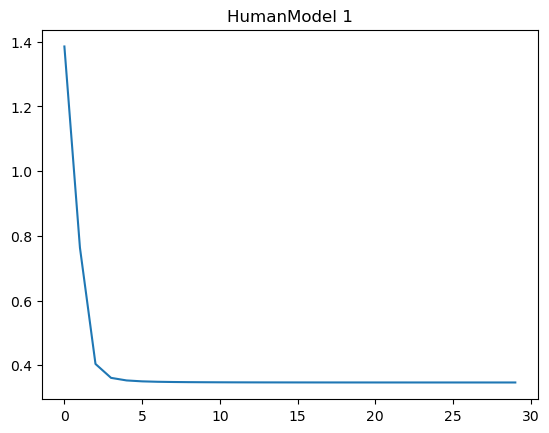

In [18]:
# II-1
train_losses = torch.load("./results/231016234028_II_1/train_losses_II_1.pt")
plt.title("HumanModel 1")
plt.plot(train_losses), train_losses

In [15]:
# I-1
train_losses = torch.load("./results/231017152222_I_1/train_losses_I_1.pt")
eval_losses = torch.load("./results/231017152222_I_1/eval_losses_I_1.pt")
print("total: {:.4f}, DR: {:.4f}, HM: {:.4f}".format(train_losses[0][0], train_losses[0][1], train_losses[0][2]))
print("total: {:.4f}, DR: {:.4f}, HM: {:.4f}".format(eval_losses[0][0], eval_losses[0][1], eval_losses[0][2]))

total: 0.4626, DR: 0.1158, HM: 0.3468
total: 0.5104, DR: 0.1636, HM: 0.3468


([<matplotlib.lines.Line2D at 0x15dd2643400>],
 tensor([2.2001e+00, 7.9300e-01, 5.5378e-01, 3.7979e-01, 2.0771e-01, 8.0397e-02,
         2.7406e-02, 1.2246e-02, 6.9796e-03, 4.6143e-03, 3.3392e-03, 2.5667e-03,
         2.0620e-03, 1.7128e-03, 1.4610e-03, 1.2743e-03, 1.1326e-03, 1.0235e-03,
         9.3833e-04, 8.7144e-04, 8.1870e-04, 7.7726e-04, 7.4491e-04, 7.2003e-04,
         7.0133e-04, 6.8784e-04, 6.7861e-04, 6.7285e-04, 6.6976e-04, 6.6852e-04],
        dtype=torch.float64))

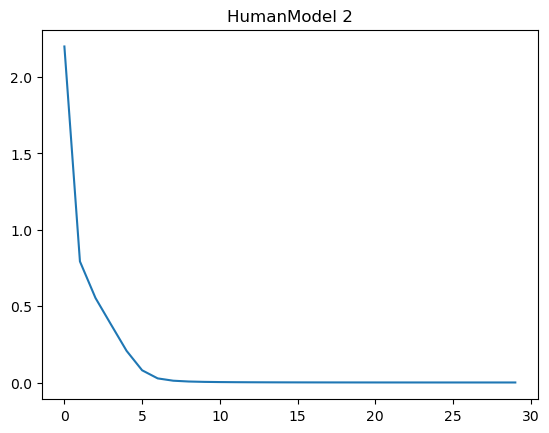

In [19]:
# II-2
# train_losses = torch.load("./results/231017155544_II_2/train_losses_II_2.pt")
train_losses = torch.load("./results/231017165347_II_2/train_losses_II_2.pt")
plt.title("HumanModel 2")
plt.plot(train_losses), train_losses

In [21]:
# I-2
# train_losses = torch.load("./results/231017160532_I_2/train_losses_I_2.pt")
# eval_losses = torch.load("./results/231017160532_I_2/eval_losses_I_2.pt")
train_losses = torch.load("./results/231017170524_I_2/train_losses_I_2.pt")
eval_losses = torch.load("./results/231017170524_I_2/eval_losses_I_2.pt")
print("total: {:.4f}, DR: {:.4f}, HM: {:.4f}".format(train_losses[0][0], train_losses[0][1], train_losses[0][2]))
print("total: {:.4f}, DR: {:.4f}, HM: {:.4f}".format(eval_losses[0][0], eval_losses[0][1], eval_losses[0][2]))

total: 0.1160, DR: 0.1153, HM: 0.0007
total: 0.1634, DR: 0.1627, HM: 0.0007


([<matplotlib.lines.Line2D at 0x15dd26b9550>],
 tensor([7.7016e+00, 2.3546e+00, 9.7913e-01, 4.8165e-01, 1.9009e-01, 7.9100e-02,
         4.0960e-02, 2.4689e-02, 1.6554e-02, 1.1995e-02, 9.1941e-03, 7.3537e-03,
         6.0804e-03, 5.1333e-03, 4.3444e-03, 3.7562e-03, 3.3197e-03, 2.9898e-03,
         2.7365e-03, 2.5397e-03, 2.3863e-03, 2.2666e-03, 2.1738e-03, 2.1029e-03,
         2.0500e-03, 2.0119e-03, 1.9859e-03, 1.9698e-03, 1.9612e-03, 1.9578e-03],
        dtype=torch.float64))

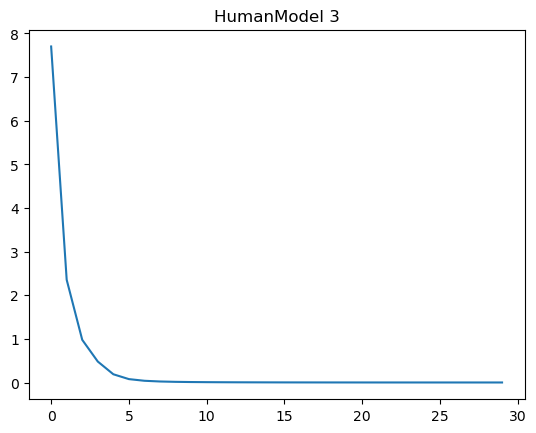

In [22]:
# II-3
train_losses = torch.load("./results/231017172646_II_3/train_losses_II_3.pt")
plt.title("HumanModel 3")
plt.plot(train_losses), train_losses

In [23]:
# I-3
train_losses = torch.load("./results/231017173718_I_3/train_losses_I_3.pt")
eval_losses = torch.load("./results/231017173718_I_3/eval_losses_I_3.pt")
print("total: {:.4f}, DR: {:.4f}, HM: {:.4f}".format(train_losses[0][0], train_losses[0][1], train_losses[0][2]))
print("total: {:.4f}, DR: {:.4f}, HM: {:.4f}".format(eval_losses[0][0], eval_losses[0][1], eval_losses[0][2]))

total: 0.1170, DR: 0.1149, HM: 0.0021
total: 0.1628, DR: 0.1606, HM: 0.0022


# evaluation

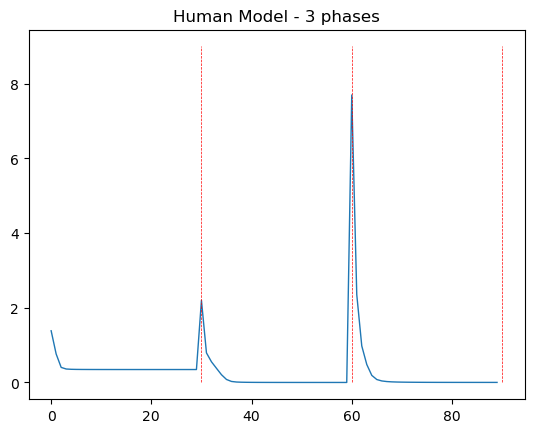

In [39]:
# II
train_losses1 = torch.load("./results/231016234028_II_1/train_losses_II_1.pt")
train_losses2 = torch.load("./results/231017165347_II_2/train_losses_II_2.pt")
train_losses3 = torch.load("./results/231017172646_II_3/train_losses_II_3.pt")

HM_loss_li = torch.hstack([train_losses1, train_losses2, train_losses3])

plt.plot(HM_loss_li, linewidth=1)
plt.vlines([30, 60, 90], 0, 9, linestyles='dashed', colors='red', linewidth=0.5)
plt.title("Human Model - 3 phases")
plt.show()

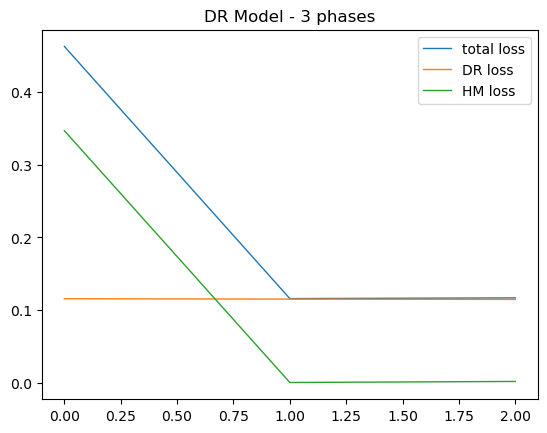

In [55]:
# I
train_losses1 = torch.load("./results/231017152222_I_1/train_losses_I_1.pt")
train_losses2 = torch.load("./results/231017170524_I_2/train_losses_I_2.pt")
train_losses3 = torch.load("./results/231017173718_I_3/train_losses_I_3.pt")

DR_total_loss_li = torch.hstack([train_losses1[0][0], train_losses2[0][0], train_losses3[0][0]])
DR_DR_loss_li = torch.hstack([train_losses1[0][1], train_losses2[0][1], train_losses3[0][1]])
DR_HM_loss_li = torch.hstack([train_losses1[0][2], train_losses2[0][2], train_losses3[0][2]])

plt.plot(DR_total_loss_li, linewidth=1)
plt.plot(DR_DR_loss_li, linewidth=1)
plt.plot(DR_HM_loss_li, linewidth=1)
plt.legend(["total loss", "DR loss", "HM loss"])
plt.title("DR Model - 3 phases")
plt.show()

In [50]:
DR_total_loss_li

tensor([0.4626, 0.1158, 0.3468], dtype=torch.float64)